# Segunda Prova de Visão Computacional e Processamento de Imagens
## 21/11/18 
#### Instruções:
* Desligue seu celular. Esta prova foi elaborada para ser feita em 100 minutos;
* A fraude ou a sua tentativa será punida com conceito F; 
* O aluno pode consultar qualquer coisa, porém, **não poderá trocar informações entre pessoas**. 
* A interpretação do enunciado faz parte da resposta, fundamente de maneira coerente.

## Instalações e Inicializações Sugeridas (podem utilizar outras, se preferir)

In [1]:
!pip install PyPDF2
!pip install Wand
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install python=3 --yes
!pip install opencv-python
!pip install more-itertools
!pip install pyzbar

  Running setup.py bdist_wheel for PyPDF2: started
  Running setup.py bdist_wheel for PyPDF2: finished with status 'done'
  Stored in directory: C:\Users\joaop\AppData\Local\pip\Cache\wheels\53\84\19\35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
def showfig(image, ucmap):
    imgplot=plt.imshow(image, ucmap)
# comentar esta linha para rodar do shell
#get_ipython().magic(u'matplotlib inline')

import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import platform
from pyzbar.pyzbar import decode
import PyPDF2

import cv2

In [3]:
print ("      Python version: {}".format(platform.python_version()))
print ("      OpenCV version: {}".format(cv2.__version__))

      Python version: 3.7.0
      OpenCV version: 3.4.3


## Ler um arquivo pdf e gerar uma imagem

In [4]:
try:
        CV_CUR_LOAD_IM_GRAY = cv2.CV_LOAD_IMAGE_GRAYSCALE
except AttributeError:
        CV_CUR_LOAD_IM_GRAY = cv2.IMREAD_GRAYSCALE

In [5]:
def tiff_header_for_ccitt(width, height, img_size, ccitt_group=4):
        tiff_header_struct = '<' + '2s' + 'h' + 'l' + 'h' + 'hhll' * 8 + 'h'
        return struct.pack(tiff_header_struct,
                           b'II',  # Byte order indication: Little indian
                           42,  # Version number (always 42)
                           8,  # Offset to first IFD
                           8,  # Number of tags in IFD
                           256, 4, 1, width,  # ImageWidth, LONG, 1, width
                           257, 4, 1, height,  # ImageLength, LONG, 1, lenght
                           258, 3, 1, 1,  # BitsPerSample, SHORT, 1, 1
                           259, 3, 1, ccitt_group,  # Compression, SHORT, 1, 4 = CCITT Group 4 fax encoding
                           262, 3, 1, 0,  # Threshholding, SHORT, 1, 0 = WhiteIsZero
                           273, 4, 1, struct.calcsize(tiff_header_struct),  # StripOffsets, LONG, 1, len of header
                           278, 4, 1, height,  # RowsPerStrip, LONG, 1, lenght
                           279, 4, 1, img_size,  # StripByteCounts, LONG, 1, size of image
                           0  # last IFD
                           )
    
def handle_ccitt_fax_decode_img(obj):
        if obj['/DecodeParms']['/K'] == -1:
            ccitt_group = 4
        else:
            ccitt_group = 3
        width = obj['/Width']
        height = obj['/Height']
        data = obj._data  # sorry, getData() does not work for CCITTFaxDecode
        img_size = len(data)
        tiff_header = tiff_header_for_ccitt(width, height, img_size, ccitt_group)
        data = tiff_header + data
        return cv2.imdecode(np.frombuffer(data, np.uint8), CV_CUR_LOAD_IM_GRAY)

def handle_other_img(obj):
        data = obj._data
        return 255 - cv2.imdecode(np.frombuffer(data, np.uint8), CV_CUR_LOAD_IM_GRAY)

def get_img_from_page(pdf_obj, page):
        page_obj = pdf_obj.getPage(page)
        x_obj = page_obj['/Resources']['/XObject'].getObject()
        for obj in x_obj:
            if x_obj[obj]['/Subtype'] == '/Image':
                if x_obj[obj]['/Filter'] == '/CCITTFaxDecode':
                    return handle_ccitt_fax_decode_img(x_obj[obj])
                else:
                    return handle_other_img(x_obj[obj])
def get_images_from_pdf(file_path):
        pdf_obj = PyPDF2.PdfFileReader(open(file_path, "rb"))
        n_pages = pdf_obj.getNumPages()
        images = [get_img_from_page(pdf_obj, page) for page in range(n_pages)]
        return images


In [6]:
imgs = get_images_from_pdf('prova2.pdf')

In [7]:
count=0
for img in imgs:
    file='prova2pag'+str(count)+'.png'
    H = 1754;   W = 1350;
    img = 255-cv2.resize(img,(W,H), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite('prova2pag'+str(count)+'resize.png',img)
    count+=1

In [9]:
!ls -al

'ls' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [4]:
def cleanImage(img):
    inverted = np.bitwise_not(img)
    b = np.ones((5,5),np.uint8)
    erosion = cv2.erode(inverted,b,iterations = 4)
    #erosion = cv2.erode(erosion,b,iterations = 2)
    
    return erosion


def examSegment(file):
    # CONSTRUIR O SEU CÓDIGO AQUI
    img = cv2.imread(file,0)
    #plt.figure(figsize=(10,10))
    #showfig(img, 'gray')
    
    img1 = cleanImage(img)
    #plt.figure(figsize=(10,10))
    #showfig(img1, 'gray')
    
    # finding contours
    _, ct, hierarchy = cv2.findContours(img1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    p1 = ct[1][0]
    #p1 = ct[0][0]
    p2 = ct[2][len(ct[2])-1]
    
    # Croping
    croped = img[ p2[0][1]:p1[0][1],p1[0][0]:p2[0][0]]
    
    return croped

prova2pag0resize.png
prova2pag1resize.png
prova2pag2resize.png
prova2pag3resize.png


in singular transformations; automatically expanding.
left=-0.5, right=-0.5 [_base.py:3152]


prova2pag4resize.png
prova2pag5resize.png
prova2pag6resize.png
prova2pag7resize.png


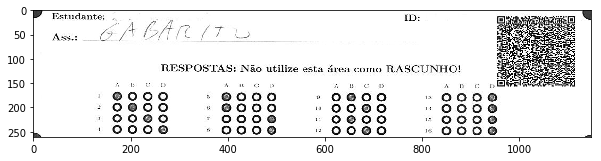

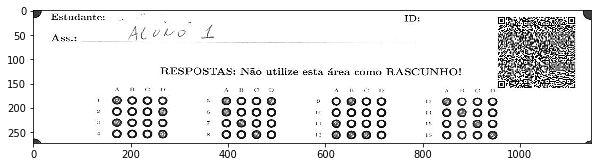

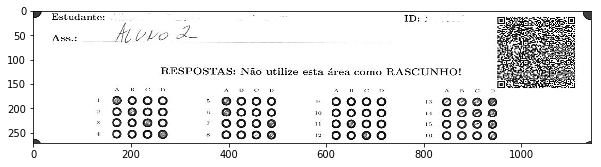

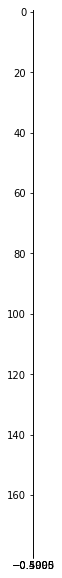

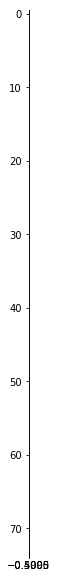

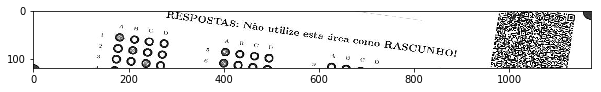

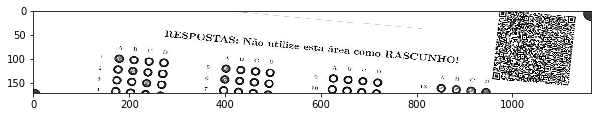

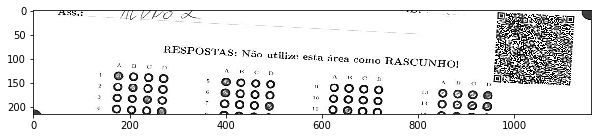

In [89]:
count=0
for img in imgs:
    file0="prova2pag"+str(count)+"resize.png"
    print(file0)
    pag = examSegment(file0)
    plt.figure(figsize=(10,10))
    showfig(pag, 'gray')
    count+=1

In [5]:
file0="prova2pag0resize.png"
pag0 = examSegment(file0)

In [6]:
file1="prova2pag1resize.png"
pag1 = examSegment(file1)

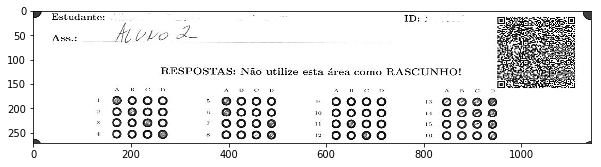

In [85]:
file2="prova2pag2resize.png"
pag2 = examSegment(file2)

In [18]:
def qrcodeSegment(img,file):# segmentar QRCode
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    segmentado = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((10,10)))
    segmentado = cv2.morphologyEx(segmentado, cv2.MORPH_OPEN, np.ones((90,50)))

    im2, contours, hierarchy = cv2.findContours(cv2.bitwise_not(segmentado), 1, 2)

    colored = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(colored,(x,y),(x+w,y+h),(255,0,0),15)
    
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if 22000 < cv2.contourArea(cnt) < 240000:
            codigo = img[y-5:y+h+2, x-6:x+w+2]
            dec = decode(codigo)
            if dec:
                data = dec[0].data
                print(data)
            else:
                print('Falha na leitura!')
    showfig(codigo, 'gray')
    cv2.imwrite(file[:-4]+"_qrcode.png",codigo)

b'789c3d8e010a44410842afa459cd2cddff5e6b0c7c821e654abcb851434e72180720cf70ab075fe5745e3130ddee9419f0c2fb1296f224eb750879ae24c277d5b2c177e7b1ae104b18abebe5169fde7e61fdf97bf90edefc3f7e6e2280'


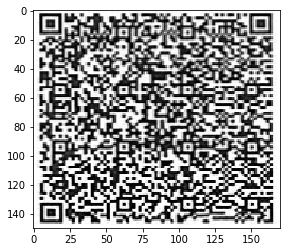

In [19]:
qrcodeSegment(pag0,file0)

b'789c3d8cc90d04410c0253027c748f9c7f5e8bf7120f042ecc8bab1a7292431da87986ab1efc95d35962603a32203a8b08393f02c34ed7f622b55c81c2e60bc5f28f8bcdc590eff9e3f5e5e3f327af67e6db33d8ebbcf72f7e0a227d'


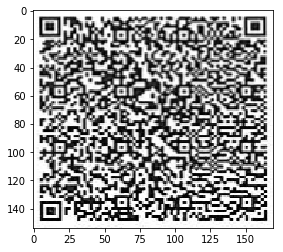

In [20]:
qrcodeSegment(pag1,file1)

b'789c3d8ccb0dc0300c425702fc492aefbf57891a551c90013f6e6cd590931c6a01e21a1ef5e0574e478a08bb82c2744908da53a0f32a057c27ee6e113afe787efaed58eef3fa16c31c63e3f072f9d1bbd6d7575fbe29c4bc7b6d227a'


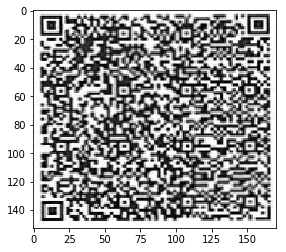

In [21]:
qrcodeSegment(pag2,file2)

## 1) Implemente uma solução para segmentar o retângulo entre os 4 discos maiores e salvar em uma imagem no disco.

### Importante: os 4 discos maiores sempre formam um retângulo e podem estar em quaisquer possições da imagem.


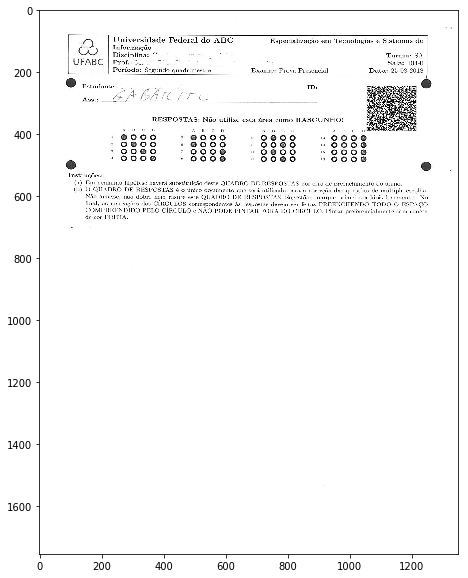

In [86]:
pag0 = cv2.imread("prova2pag0resize.png", 0) # entrada 1
pag1 = cv2.imread("prova2pag1resize.png", 0) # entrada 2
pag2 = cv2.imread("prova2pag2resize.png", 0) # entrada 3
plt.figure(figsize=(10,10))
showfig(pag0, 'gray')

## 2) Implemente uma solução para segmentar os 4 blocos de questões.

### Importante: cada bloco de questão pode estar em qualquer posição na folha, entre os 4 discos maiores. Cada bloco possui no mínimo 4 questões. Cada questão possui no mínimo duas alternativas.


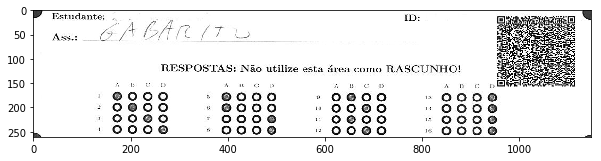

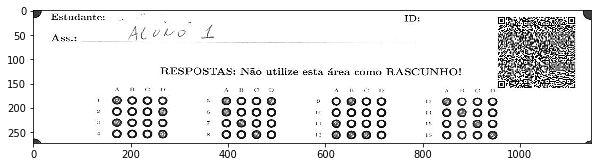

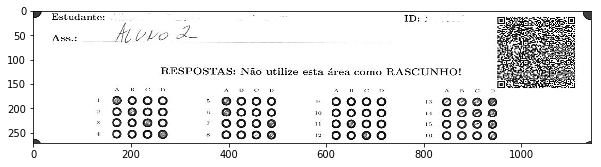

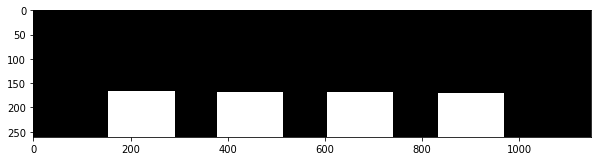

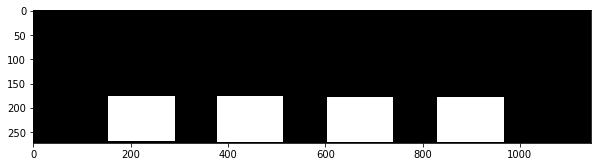

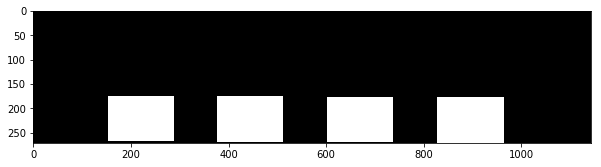

In [98]:
#pag0_seg = cv2.imread("prova2pag0resize_segmentation.png", 0) # entrada 1
#pag1_seg = cv2.imread("prova2pag1resize_segmentation.png", 0) # entrada 2
#pag2_seg = cv2.imread("prova2pag2resize_segmentation.png", 0) # entrada 3

pag0_seg = examSegment("prova2pag0resize.png")
pag1_seg = examSegment("prova2pag1resize.png")
pag2_seg = examSegment("prova2pag2resize.png")


plt.figure(figsize=(10,10))
showfig(pag0_seg, 'gray')
plt.figure(figsize=(10,10))
showfig(pag1_seg, 'gray')
plt.figure(figsize=(10,10))
showfig(pag2_seg, 'gray')

def cleanImage2(img):
    bounds = []
    
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    segmentado = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((10,10)))
    segmentado = cv2.morphologyEx(segmentado, cv2.MORPH_OPEN, np.ones((20,10)))
    segmentado = cv2.dilate(segmentado,np.ones((5,30)),iterations= 1)
    
    
    im2, contours, hierarchy = cv2.findContours(segmentado, 1, 2)

    result = np.zeros(segmentado.shape)
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        #print(cv2.contourArea(cnt))
        if 1200 < cv2.contourArea(cnt) < 22000:
            result[y:y+h, x:x+w] = 255
            bounds.insert(0,[(y,y+h), (x,x+w)])
    
    result = cv2.dilate(result,np.ones((5,1)),iterations= 1)
    
    return result, bounds

pag0_seg_cleaned ,b0 = cleanImage2(pag0_seg)
plt.figure(figsize=(10,10))
showfig(pag0_seg_cleaned, 'gray')

pag1_seg_cleaned,b1 = cleanImage2(pag1_seg)
plt.figure(figsize=(10,10))
showfig(pag1_seg_cleaned, 'gray')

pag2_seg_cleaned,b2 = cleanImage2(pag2_seg)
plt.figure(figsize=(10,10))
showfig(pag2_seg_cleaned, 'gray')




## 3) Implemente uma solução para segmentar cada questão dentro de um bloco e qual foi a resposta.  

### Importante: Após a segmentação de cada questão, criar uma estrutura de dados para armazenar a resposta de cada questão, por exemplo, um simples vetor (array) pode armazenar a primeira  prova como segue:

In [99]:
#q 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 
v=[0,1,2,3,0,0,3,3,1, 2, 1, 2, 3, 3, 3, 3]
#r A B C D A A D D B  C  B  C  D  D  D  D

def getQuestions(img, masks, debug = False):
    results = []
    for mask in masks:
        questions = []
        cutted = img[mask[0][0]:mask[0][1],mask[1][0]:mask[1][1]]

        #plt.figure(figsize=(10,10))
        #showfig(cutted, 'gray')

        inverted = cv2.bitwise_not(cutted)

        if(debug):
            plt.figure(figsize=(10,10))
            showfig(inverted, 'gray')

        result = cv2.dilate(inverted,np.ones((1,40)),iterations= 1)

        ret, result = cv2.threshold(result,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        result = cv2.bitwise_not(result)

        im2, contours, hierarchy = cv2.findContours(result, 1, 2)

        result = np.zeros(result.shape)

        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            #print(cv2.contourArea(cnt))
            if cv2.contourArea(cnt):
                result[y:y+h, x:x+w] = 255
                questions.insert(0,[(y,y+h), (x,x+w)])


        
        for question in questions:
            qt = cutted[question[0][0]:question[0][1],question[1][0]:question[1][1]]


            ret, result = cv2.threshold(qt,100,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            result = cv2.dilate(result,np.ones((5,5)),iterations= 1)
            result = cv2.erode(result,np.ones((5,5)),iterations= 4)

            
            if(debug):
                plt.figure(figsize=(10,10))
                showfig(qt, 'gray')
                plt.figure(figsize=(10,10))
                showfig(result, 'gray')

            
            im2, contours, _ = cv2.findContours(result, 1, 2)
            correct = 0
            if(len(contours) == 1):
                for cnt in contours:
                    x,y,w,h = cv2.boundingRect(cnt)
                    #print(cv2.contourArea(cnt))
                    correct = x +(w/2)


                percent = correct/(result.shape[1])
            
                if(debug):
                    aux = np.zeros(result.shape)
                    aux[10,int(correct)] = 255
                    plt.figure(figsize=(10,10))
                    showfig(aux, 'gray')

                resp = int(percent/0.25)
                results.append(resp)
            else:
                results.append(-1)

            if(debug):
                print(resp)
                print("=====")

    return results
    
results = getQuestions(pag0_seg,b0)
print(results)

results = getQuestions(pag1_seg,b1)
print(results)

results = getQuestions(pag2_seg,b2)
print(results)



[0, 1, 2, 3, 0, 0, 3, 3, 1, 2, 1, 2, 3, 3, 3, 3]
[0, 3, 0, 3, -1, 0, 1, 2, 1, -1, 0, -1, 0, 1, 2, 3]
[0, 1, 2, 3, 0, 0, 3, 3, -1, -1, 1, 2, -1, -1, -1, 3]


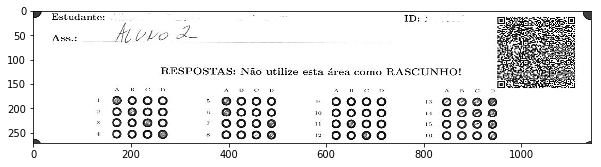

In [104]:
plt.figure(figsize=(10,10))
showfig(pag2_seg, 'gray')

## 4) Considere que a página 0 é o gabarito e a página 1 e a resposta de um aluno. Construa um código para mostrar o que o aluno respondeu, a resposta correta e quantas questões o aluno acertou.

In [108]:
gabarito = getQuestions(pag0_seg,b0)

al1 = getQuestions(pag1_seg,b1)
al2 = getQuestions(pag2_seg,b2)


def calcNota(gab, resp):
    result = []
    nota = 0
    dictQuestion = {-1:"ANULADA",0:"A",1:"B",2:"C",3:"D"}
    for i in range(len(gab)):
        if(gab[i] == resp[i]):
            nota+=1
        
        result.append({"Questão":i,"Correta":gab[i],"Respondida":resp[i]})

        print("Questão: ",i, " Correta: ",dictQuestion[gab[i]], "Respondida: ",dictQuestion[resp[i]])
        
        
            
    print("Acertos: ",nota,"de",len(gab))
    return result, nota

print("\nCorrecao al1")
correcao, nota = calcNota(gabarito,al1)

print("\nCorrecao al2")
correcao, nota = calcNota(gabarito,al2)




Correcao al1
Questão:  0  Correta:  A Respondida:  A
Questão:  1  Correta:  B Respondida:  D
Questão:  2  Correta:  C Respondida:  A
Questão:  3  Correta:  D Respondida:  D
Questão:  4  Correta:  A Respondida:  ANULADA
Questão:  5  Correta:  A Respondida:  A
Questão:  6  Correta:  D Respondida:  B
Questão:  7  Correta:  D Respondida:  C
Questão:  8  Correta:  B Respondida:  B
Questão:  9  Correta:  C Respondida:  ANULADA
Questão:  10  Correta:  B Respondida:  A
Questão:  11  Correta:  C Respondida:  ANULADA
Questão:  12  Correta:  D Respondida:  A
Questão:  13  Correta:  D Respondida:  B
Questão:  14  Correta:  D Respondida:  C
Questão:  15  Correta:  D Respondida:  D
Acertos:  5 de 16

Correcao al2
Questão:  0  Correta:  A Respondida:  A
Questão:  1  Correta:  B Respondida:  B
Questão:  2  Correta:  C Respondida:  C
Questão:  3  Correta:  D Respondida:  D
Questão:  4  Correta:  A Respondida:  A
Questão:  5  Correta:  A Respondida:  A
Questão:  6  Correta:  D Respondida:  D
Questão:  

## 5) Para casa: implementar uma solução para marcar sobre cada questão: resposta correta em azul, errada em vermelho e inválida em amarelo.